<a href="https://colab.research.google.com/github/DanishFaraaz/Deep-Learning-Projects/blob/main/1_Pytorch_CNN_tutorial_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing libraries and modules**

In [ ]:
import torch

import torchvision
import torchvision.transforms as transforms

import torch.optim as optim
import torch.nn as nn

print("GPU available: {}".format(torch.cuda.is_available()))

GPU available: True


In [ ]:
if torch.cuda.is_available():
  device = 'cuda'
else:
  device = 'cpu'

In [ ]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, ), (0.5, ))])

In [ ]:
trainset = torchvision.datasets.MNIST('mnist', train = True, download = True, transform = transform)

testset = torchvision.datasets.MNIST('mnist', train = False, download = True, transform = transform)

100%|██████████| 9912422/9912422 [00:00<00:00, 161314359.72it/s]


Extracting mnist/MNIST/raw/train-images-idx3-ubyte.gz to mnist/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 109724360.35it/s]

Extracting mnist/MNIST/raw/train-labels-idx1-ubyte.gz to mnist/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 151051466.56it/s]


Extracting mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to mnist/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 22842360.63it/s]

Extracting mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to mnist/MNIST/raw



**Inspecting the data**

In [ ]:
print(trainset.data.shape)
print(testset.data.shape)

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])


**Inspecting individual data**

In [ ]:
print(trainset.data[0].shape)
print(testset.data[0])

torch.Size([28, 28])
tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,  

**Plotting in OpenCV**

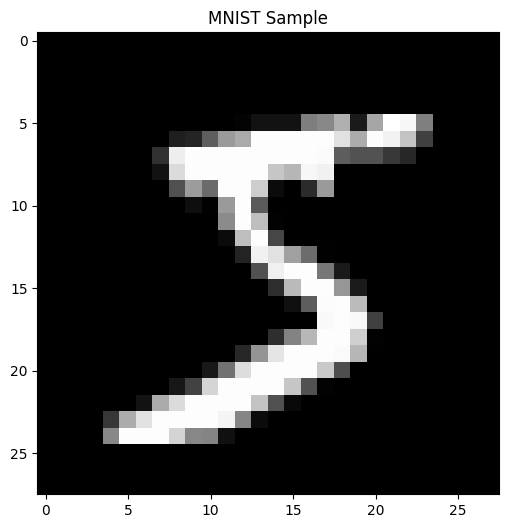

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define imshow function
def imgshow(title = "", image = None, size = 6):
  w, h = image.shape[0], image.shape[1]
  aspect_ratio = w/h
  plt.figure(figsize = (size * aspect_ratio, size))
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.title(title)
  plt.show()

# Convert image to numpy array
image = trainset.data[0].numpy()
imgshow("MNIST Sample", image)

**Alternate way to plot groups of data**

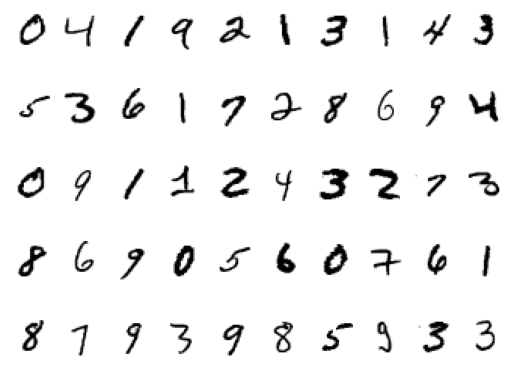

In [ ]:
import matplotlib.pyplot as plt

figure = plt.figure()
num_of_images = 50

for index in range(1, num_of_images+1):
  plt.subplot(5, 10, index)
  plt.axis("off")
  plt.imshow(trainset.data[index], cmap = "gray_r")

**Creating a Data Loader**

In [ ]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 128, shuffle = True, num_workers = 0)

testloader = torch.utils.data.DataLoader(testset, batch_size = 128, shuffle = False, num_workers = 0)

In [ ]:
dataiter = iter(trainloader)

images, labels = dataiter.__next__()

print(images.shape)
print(labels.shape)

torch.Size([128, 1, 28, 28])
torch.Size([128])


In [ ]:
images[0].shape

torch.Size([1, 28, 28])

**Plotting using Pytorch's plotting tool**

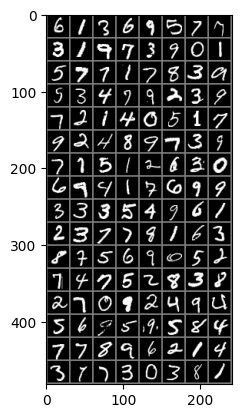

61369577319739015771783953479239721405179248973971512630694176993335496123778163875690527475283827092494569595847789621437730381


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
  img = img/2 + 0.5     #unnormalize
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()

dataiter = iter(trainloader)
images, labels = dataiter.__next__()

imshow(torchvision.utils.make_grid(images))

print(''.join('%1s' % labels[j].numpy() for j in range(128)))

**Buiding our CNN Model**

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()

    self.conv1 = nn.Conv2d(1, 32, 3)
    self.conv2 = nn.Conv2d(32, 64, 3)
    self.pool = nn.MaxPool2d(2, 2)
    self.fc1 = nn.Linear(64 * 12 * 12, 128)
    self.fc2 = nn.Linear(128, 10)

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 64 * 12 * 12)
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return x

net = Net()
net.to(device)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [ ]:
print(net)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


**Defining the Loss Function and Optimizer**

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum = 0.9)

**Training the model**

In [ ]:
epochs = 10

epoch_log = []
loss_log = []
accuracy_log = []

for epoch in range(epochs):
  print(f'Starting epoch: {epoch+1}....')

  running_loss = 0.0

  for i, data in enumerate(trainloader, 0):
    inputs, labels = data

    # Move data to GPU
    inputs = inputs.to(device)
    labels = labels.to(device)

    optimizer.zero_grad()

    # Forward -> backprop + optimize
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()

    if i % 50 == 49:
      correct = 0
      total = 0

      with torch.no_grad():
        for data in testloader:
          images, labels = data

          images = images.to(device)
          labels = labels.to(device)

          outputs = net(images)

          _, predicted = torch.max(outputs.data, dim = 1)

          total += labels.size(0)
          correct += (predicted==labels).sum().item()

        accuracy = 100 * correct / total
        epoch_num = epoch + 1
        actual_loss = running_loss / 50
        print(f'Epoch : {epoch_num}, Mini-Batches Completed: {(i + 1)}, Loss: {actual_loss:.3f}, Test Accuracy = {accuracy:.3f}%')
        running_loss = 0.0

  epoch_log.append(epoch_num)
  loss_log.append(actual_loss)
  accuracy_log.append(accuracy)

print("Finished Training")

Starting epoch: 1....
Epoch : 1, Mini-Batches Completed: 50, Loss: 2.282, Test Accuracy = 42.840%
Epoch : 1, Mini-Batches Completed: 100, Loss: 2.182, Test Accuracy = 62.360%
Epoch : 1, Mini-Batches Completed: 150, Loss: 1.921, Test Accuracy = 69.550%
Epoch : 1, Mini-Batches Completed: 200, Loss: 1.313, Test Accuracy = 78.880%
Epoch : 1, Mini-Batches Completed: 250, Loss: 0.735, Test Accuracy = 85.600%
Epoch : 1, Mini-Batches Completed: 300, Loss: 0.515, Test Accuracy = 87.760%
Epoch : 1, Mini-Batches Completed: 350, Loss: 0.441, Test Accuracy = 88.480%
Epoch : 1, Mini-Batches Completed: 400, Loss: 0.389, Test Accuracy = 89.450%
Epoch : 1, Mini-Batches Completed: 450, Loss: 0.391, Test Accuracy = 89.560%
Starting epoch: 2....
Epoch : 2, Mini-Batches Completed: 50, Loss: 0.355, Test Accuracy = 90.220%
Epoch : 2, Mini-Batches Completed: 100, Loss: 0.339, Test Accuracy = 90.910%
Epoch : 2, Mini-Batches Completed: 150, Loss: 0.311, Test Accuracy = 91.370%
Epoch : 2, Mini-Batches Completed:

**Saving the Model**

In [ ]:
PATH = './mnist_cnn_net.pth'
torch.save(net.state_dict(), PATH)

**View Test data and Ground Truth**

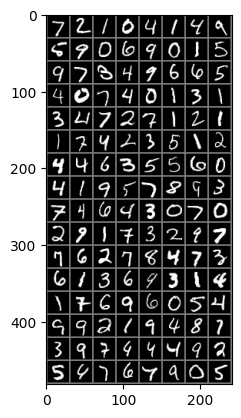

Ground Truth:  72104149590690159734966540740131347271211742351244635560419578937464307029173297762784736136931417696054992194873974449254767905


In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.__next__()

imshow(torchvision.utils.make_grid(images))
print('Ground Truth: ', ''.join('%1s' % labels[j].numpy() for j in range(128)))

**Reload saved model**

In [ ]:
net = Net()
net.to(device)

net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

**Getting Predictions**

In [ ]:
test_iter = iter(testloader)
images, labels = dataiter.__next__()

images = images.to(device)
labels = labels.to(device)

outputs = net(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ''.join('%1s' % predicted[j].cpu().numpy() for j in range(128)))

Predicted:  85665781016467317182029955156034465465451447232718181850892501110903164236111395294593903655722712841733887922415987230242419577


**Displaying the Test Accuracy again**

In [ ]:
correct = 0
total = 0

with torch.no_grad():
  for data in testloader:
    images, labels = data

    images = images.to(device)
    labels = labels.to(device)

    outputs = net(images)
    _, predicted = torch.max(outputs, 1)

    total += labels.size(0)
    correct += (predicted==labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the network on 10000 images: {accuracy:.3f}%')

Accuracy of the network on 10000 images: 98.010%


**Plotting the training log**

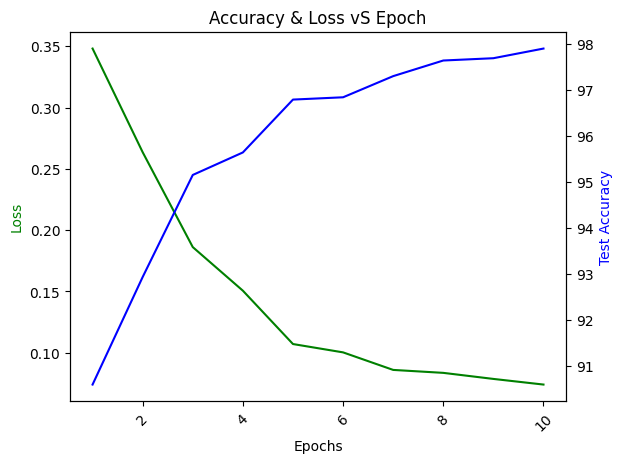

In [ ]:
fig, ax1 = plt.subplots()

plt.title("Accuracy & Loss vS Epoch")
plt.xticks(rotation=45)

# Add a secondary y-axis
ax2 = ax1.twinx()

ax1.plot(epoch_log, loss_log, 'g-')
ax2.plot(epoch_log, accuracy_log, 'b-')

ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color='g')
ax2.set_ylabel('Test Accuracy', color='b')

plt.show()